In [1]:
import numpy as np
from numpy.core.umath_tests import inner1d
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
import random
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import pickle
%matplotlib inline

In [2]:
from numpy_artm import *

In [3]:
def plot_mean(values):
    samples, iters = len(values), len(values[0])
    iter_range = range(1, iters + 1)
    val = np.mean(values, axis=0)
    err = 1.96 * np.std(values, axis=0) / np.sqrt(samples)
    plt.plot(iter_range, val)
    plt.fill_between(iter_range, val - err, val + err, alpha=0.5, facecolor='yellow')
    
def compare(values_list, ylabel='', legend=[]):
    plt.figure(figsize=(10, 4))
    plt.ylim(0., np.max(values_list))
    for values in values_list:
        plot_mean(values)
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.legend(legend)
    plt.grid()
    plt.show()

def phi_experiment_res(path):
    with open(path, 'r') as f:
        d = pickle.load(f)
    
    compare(
        [
            d['base_res']['train_perplexities'], 
            d['base_res']['test_perplexities'],
            d['artm_res']['train_perplexities'], 
            d['artm_res']['test_perplexities']
        ],
        'Perplexity',
        [
            'base train_perplexities', 
            'base test_perplexities',
            'artm train_perplexities', 
            'artm test_perplexities'
        ]
    )
    
    compare(
        [
            d['base_res']['kernel_avg_sizes'], 
            d['artm_res']['kernel_avg_sizes']
        ],
        'Kernel avg sizes',
        [
            'base kernel_avg_sizes', 
            'artm kernel_avg_sizes'
        ]
    )
    
    compare(
        [
            d['base_res']['kernel_avg_jacards'], 
            d['artm_res']['kernel_avg_jacards']
        ],
        'Kernel avg jacards',
        [
            'base kernel_avg_jacards', 
            'artm kernel_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['topic_correlations'], 
            d['artm_res']['topic_correlations']
        ],
        'Topic correlations',
        [
            'base topic_correlations', 
            'artm topic_correlations'
        ]
    )
    
    compare(
        [
            d['base_res']['sparsities'], 
            d['artm_res']['sparsities']
        ],
        'Phi sparsity',
        [
            'base sparsity', 
            'artm sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['theta_sparsities'], 
            d['artm_res']['theta_sparsities']
        ],
        'Theta sparsity',
        [
            'base theta sparsity', 
            'artm theta sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top5_pmis'], 
            d['artm_res']['avg_top5_pmis']
        ],
        'Top5 PMI',
        [
            'base avg_top5_pmis', 
            'artm avg_top5_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top10_pmis'], 
            d['artm_res']['avg_top10_pmis']
        ],
        'Top10 PMI',
        [
            'base avg_top10_pmis', 
            'artm avg_top10_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top20_pmis'], 
            d['artm_res']['avg_top20_pmis']
        ],
        'Top20 PMI',
        [
            'base avg_top20_pmis', 
            'artm avg_top20_pmis'
        ]
    )

# $T=10$

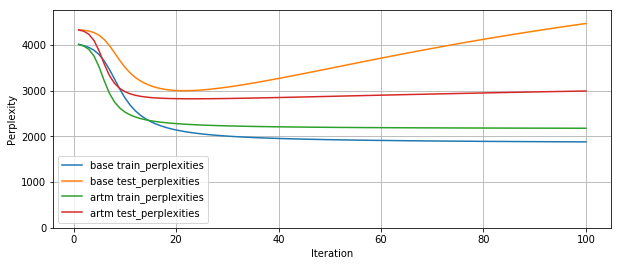

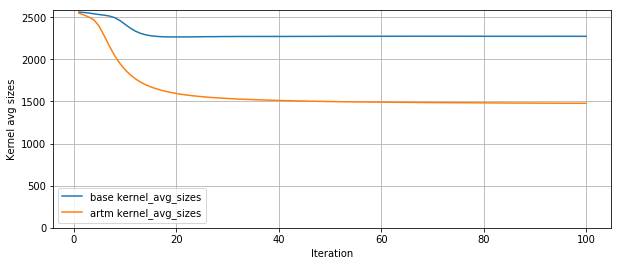

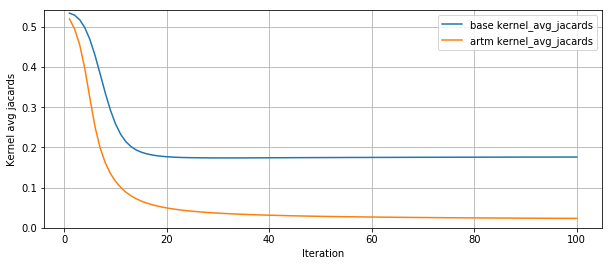

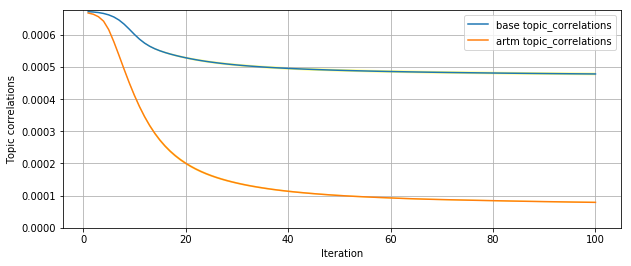

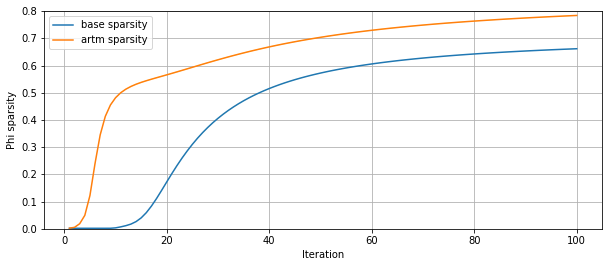

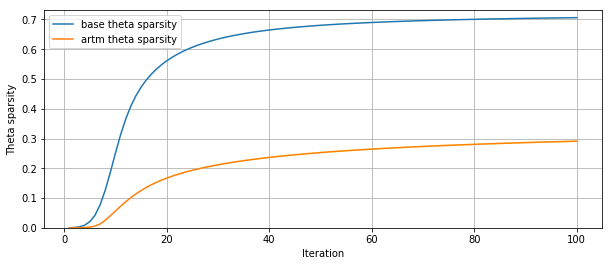

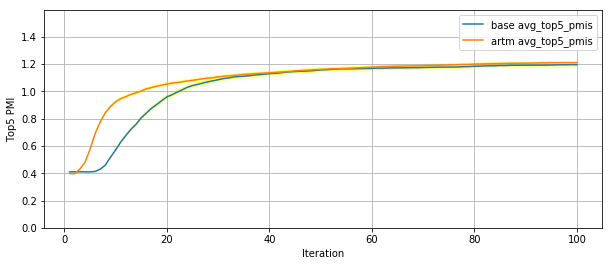

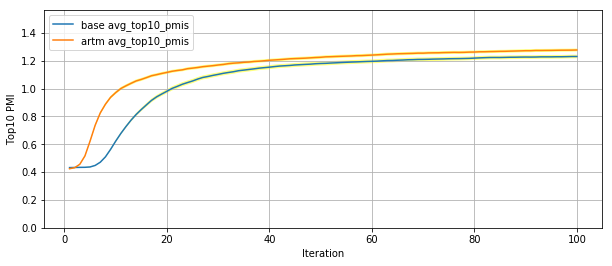

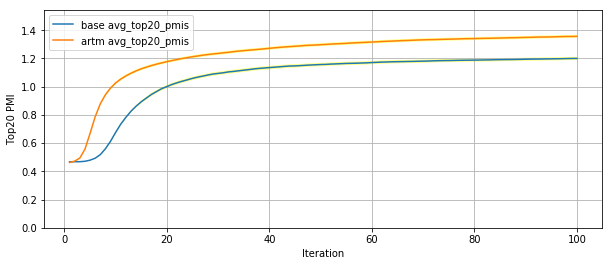

In [4]:
phi_experiment_res('./thetaless_exp/phi_exp_10_topics.pkl')

# $T=15$

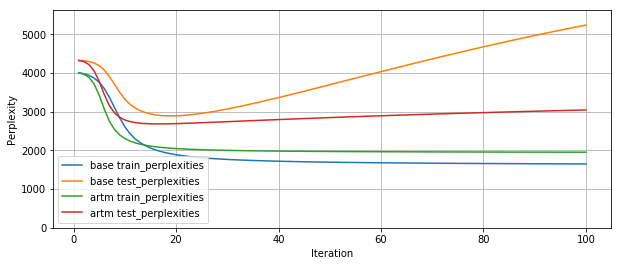

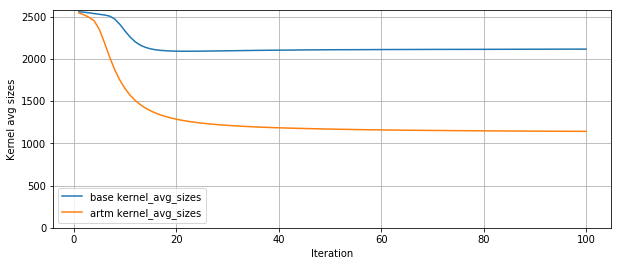

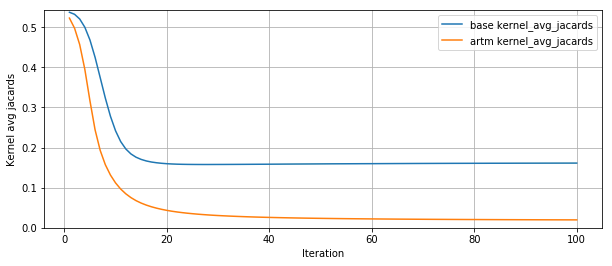

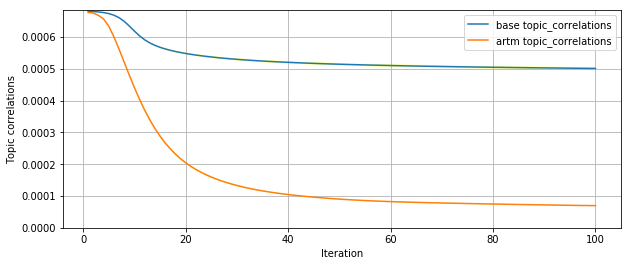

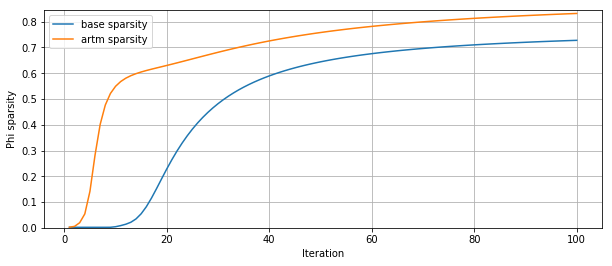

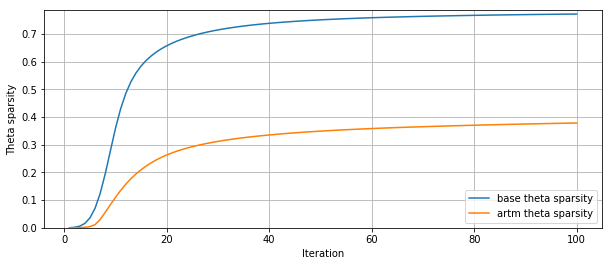

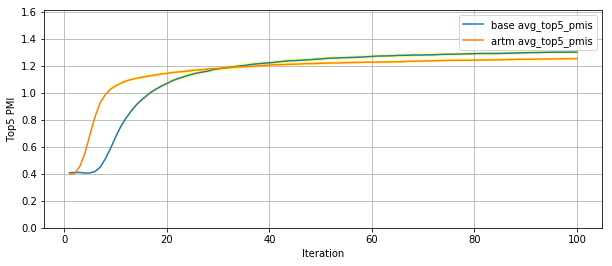

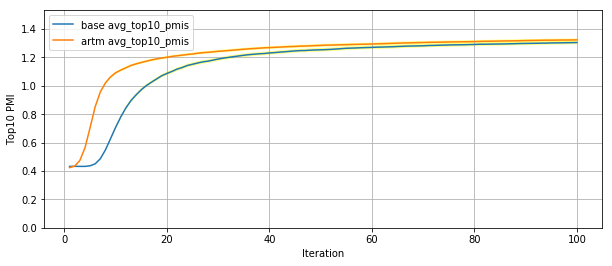

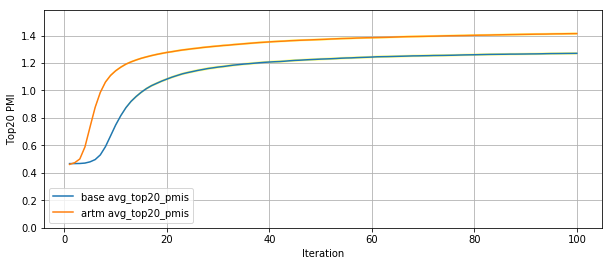

In [5]:
phi_experiment_res('./thetaless_exp/phi_exp_15_topics.pkl')

# $T=20$

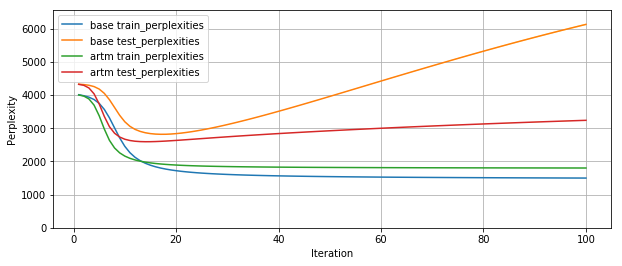

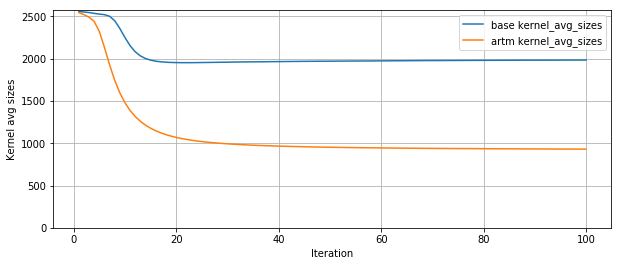

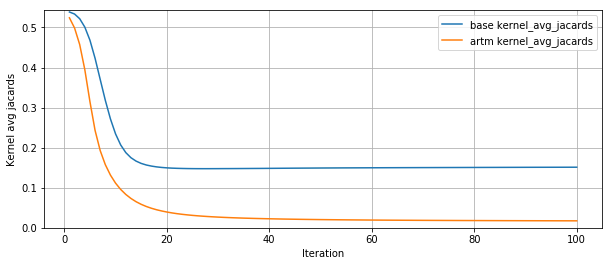

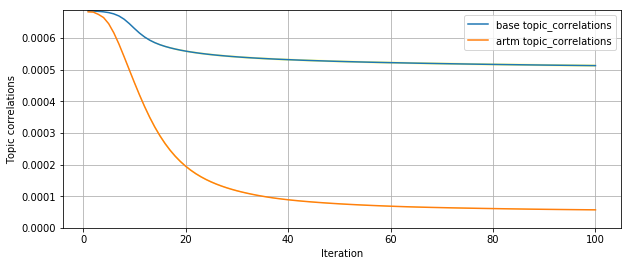

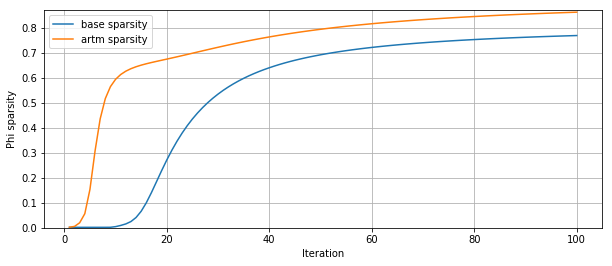

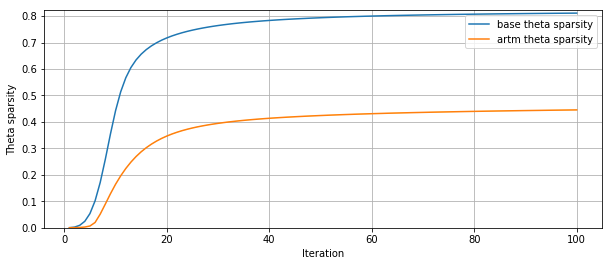

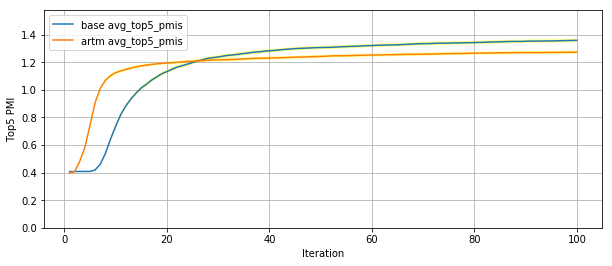

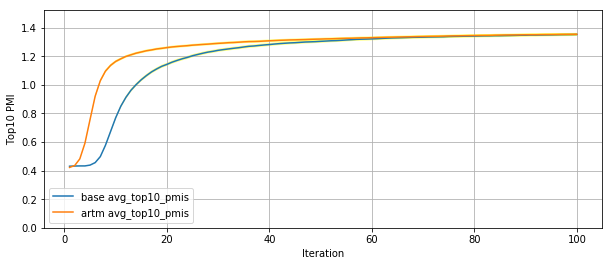

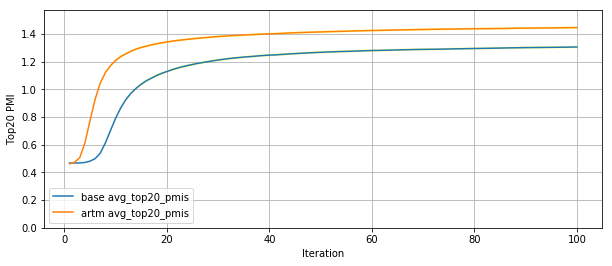

In [6]:
phi_experiment_res('./thetaless_exp/phi_exp_20_topics.pkl')